<a href="https://colab.research.google.com/github/Sayyadhujefa/DeepLearning/blob/main/Prac6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [10]:
# --- a. Load in a pre-trained CNN model trained on a large dataset ---
# Load VGG16 pre-trained on ImageNet, without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# input_shape is set to 32x32 for CIFAR-10. VGG16 was originally trained on 224x224,
# but Keras allows adapting it. However, for best results, consider resizing CIFAR-10 to 224x224 or using models designed for smaller inputs.


In [11]:
# --- b. Freeze parameters (weights) in the model’s lower convolutional layers ---
# Freeze all layers in the base model initially
for layer in base_model.layers:
     layer.trainable = False

In [12]:
# --- c. Add a custom classifier with several layers of trainable parameters ---
x = base_model.output
x = Flatten()(x) # Flatten the output of the convolutional base
x = Dense(512, activation='relu')(x) # Add a dense layer
x = Dropout(0.5)(x) # Add dropout for regularization
# Add the final output layer for classification (CIFAR-10 has 10 classes)
num_classes = 10
predictions = Dense(num_classes, activation='softmax')(x) # Softmax for multi-class classification
# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
# --- d. Train classifier layers on training data available for the task ---
# Load and preprocess CIFAR-10 data (similar to previous example)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [14]:
# Compile the model
# Use Adam optimizer with a moderate learning rate for the initial training
model.compile(optimizer=Adam(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

In [20]:
print("\nTraining (fast mode)...")

subset_size = 1000
x_train_fast = x_train[:subset_size]
y_train_fast = y_train[:subset_size]
x_test_fast = x_test[:200]
y_test_fast = y_test[:200]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train_fast, y_train_fast,
    epochs=1,
    batch_size=32,
    validation_data=(x_test_fast, y_test_fast),
    verbose=1
)

print("✅ Training completed.")



Training (fast mode)...
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 522ms/step - accuracy: 0.5853 - loss: 1.2393 - val_accuracy: 0.5450 - val_loss: 1.2909
✅ Training completed.


In [22]:
# --- e. Fine-tune hyperparameters and unfreeze more layers as needed ---
print("\nStarting fine-tuning...")
# Unfreeze some top layers of the base model
# For VGG16, let's unfreeze the last convolutional block (e.g., conv5)
# This requires knowing the layer names/indices. VGG16 has blocks 'block5_conv1', 'block5_conv2', 'block5_conv3'.
# Let's unfreeze from 'block5_conv1' onwards.
for layer in base_model.layers[20:]: # Layers from index 20 onwards in VGG16 are part of 'block5'
     layer.trainable = True
# Re-compile the model with a very low learning rate for fine-tuning
# A low learning rate prevents large updates that could destroy learned features



Starting fine-tuning...


In [23]:
model.compile(optimizer=Adam(learning_rate=0.00001), # Very low learning rate
loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary() # Check which layers are now trainable

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
print("⚡ Fast fine-tuning mode...")

# Use a small subset of data for speed
subset_size = 1000  # adjust as needed
x_train_fast = x_train[:subset_size]
y_train_fast = y_train[:subset_size]
x_test_fast = x_test[:200]
y_test_fast = y_test[:200]

# Reduce epochs drastically
fine_tune_epochs = 1
batch_size = 32

history_fine = model.fit(
    x_train_fast, y_train_fast,
    batch_size=batch_size,
    epochs=fine_tune_epochs,
    validation_data=(x_test_fast, y_test_fast),
    verbose=1
)

print("✅ Fast fine-tuning complete.")


⚡ Fast fine-tuning mode...
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 515ms/step - accuracy: 0.6051 - loss: 1.1268 - val_accuracy: 0.5650 - val_loss: 1.2823
✅ Fast fine-tuning complete.


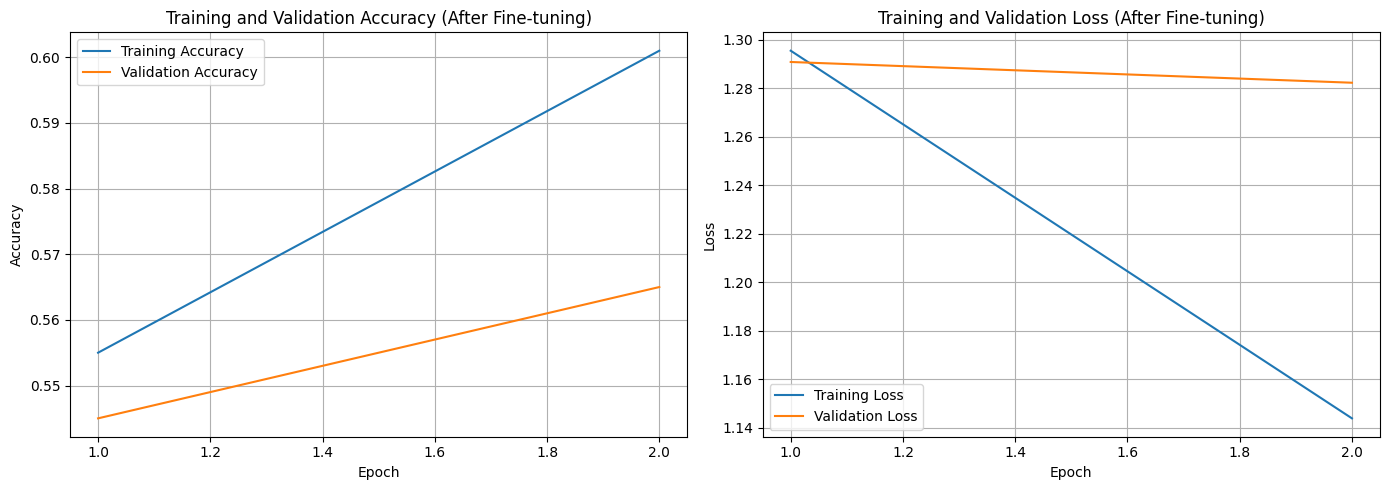


Evaluating the final fine-tuned model...
Final Test Loss: 1.2493
Final Test Accuracy: 0.5660


In [29]:
# --- Combine both training histories safely ---
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# --- Plot training history ---
plt.figure(figsize=(14, 5))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy (After Fine-tuning)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss (After Fine-tuning)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Evaluate the final model ---
print("\nEvaluating the final fine-tuned model...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")